<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics_private/blob/master/week11/Week11_Walkthrough_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering

**Goal**: our goals are to learn how to use K-means and Hierarchial clustering.

In [0]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

#The data-set
The dataset we're going to use in this walkthrough is the iris one. The iris dataset contains 3 differents types of iris.</br>
This dataset is composed of the width and length of sepal and petal of iris. We're going to do Clustering according to its length and width.

This dataset is provided in the library `sklearn` and is well known.




In [0]:
iris = datasets.load_iris()

In [0]:
print("The different type of iris are:",iris.target_names)
print("They are encode as:", iris.target)

The different type of iris are: ['setosa' 'versicolor' 'virginica']
They are encode as: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see the **iris** dataset is numpy array.<br>

For a better visualization, we're going to transform it in an `pandas dataframe`.</br>
**Hint** *Know that we can use the numpy array as-is for the k-mean*.


In [0]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
y=pd.DataFrame(iris.target, columns=["Targets"])
y.head()

,Targets
0,0
1,0
2,0
3,0
4,0


##K-means
We're going to use the K-Means provided by the `sklearn` library.<br>
For illustration, we're going to do two Kmeans:

*   K-means with **3 clusters**
*   K-means with **5 clusters**

The one with **5 clusters** is only for illustration, because we know already that there are only 3 differents types of iris in the dataset.




In [0]:
model3=KMeans(n_clusters=3)#3 clusters
model5=KMeans(n_clusters=5)#5 clusters
model3.fit(X)
model5.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In the following two **print()** you're going to find the results of ours two K-means.

In [0]:
print(model3.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [0]:
print(model5.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 0 0 4 0 4 4 0 4 0 4 0 0 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 2 0 3 2 2 3 4 3 2 3 2
 2 2 0 2 2 2 3 3 0 2 0 3 0 2 3 0 0 2 3 3 3 2 0 0 3 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


###Graphical views
The response of the K-means can be easily plot and understandable for a 2D representation.<br>
Below, you can find the scatter plot according to `"sepal length (cm)"` by `"sepal width (cm)"`.

Text(0.5, 1.0, 'Raw data')

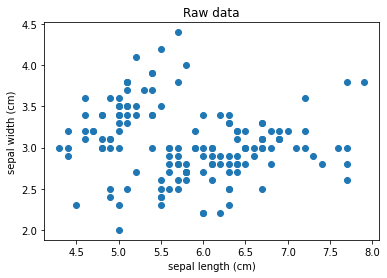

In [0]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"])

plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Raw data")

Here we're going to visualize how **K-means** performs for the differents clusters.

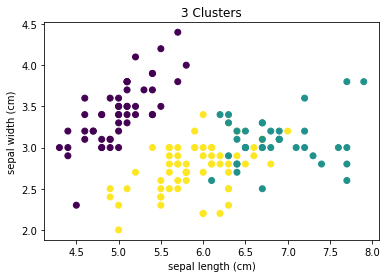

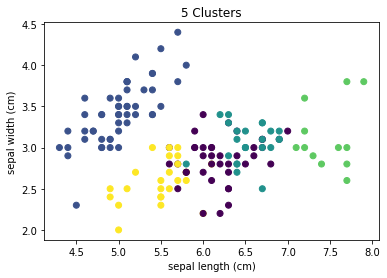

In [0]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=model3.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("3 Clusters")
plt.show()

plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=model5.labels_)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("5 Clusters")
plt.show()

Here we're going to see how the *real* classification is done.

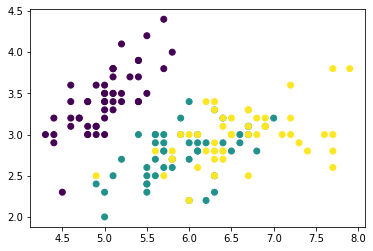

In [0]:
plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"], c=y["Targets"])

So if we take our 3 cluster K-means, how accurate is it ?<br>
To perform this we count the number of matches we have between the "3 clusters" and the standard. 

In [0]:
# how accurate are the kmeans labels
sum([1 if x else 0 for x in (model3.labels_ == iris.target)]) / len(model3.labels_)

0.44

##Elbow method
Now we will apply the **K-means** algorithm we want to estimate the number of clusters. We will use the **The Elbow Method** ([doc](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) )).  

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve (from clustering **inertia**) as the number of clusters to use. The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is **over-fitting**, and the elbow reflects this. 

Using the KMeans module from sklearn, iteratively apply the K-means algorithm, save the parameter `inertia_` (i.e sum of squared distances of samples to their closest cluster center). Then plot the inertia compared to the number of cluster. Knowing that Elbow method tells us to select the cluster when there is a significant change in inertia, find the possible elbow point (possible number of cluster).

How many clusters could you use now ?

Text(0, 0.5, 'Inertia')

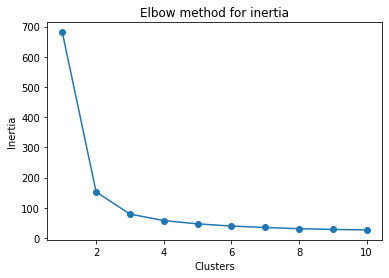

In [0]:
inertias = []
nbr_clusters = range(1,11)

for i in nbr_clusters:
    km = KMeans(n_clusters=i).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(nbr_clusters, inertias, '-o')
plt.title('Elbow method for inertia')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

## Hierarchial clustering
We're going to use the AgglomerativeClustering provided by the `sklearn` library. This will help us to do the hierarchial clustering<br>


In [0]:
from sklearn.cluster import AgglomerativeClustering

Below, we're going to creat and fit the model.

In [0]:
clustering3 = AgglomerativeClustering(n_clusters=3)
clustering3.fit(X, y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

Like before, we take a look at the "reponse" the model gave us and the original ones.

In [0]:
clustering3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [0]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As we can see the encoding of our Hierachical clustering is not the same as the original target.<br>
In order to compar them, we're going to reorder the `iris.target`.

In [0]:
reordered_target = np.zeros(len(iris.target)) #put 0 everywhere 
reordered_target[np.where(iris.target==0)[0]] = 1 #put 1 where the iris.target = 0
reordered_target[np.where(iris.target==2)[0]] = 2 #put 2 where the iris.target = 2
reordered_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

Here we can see that the final result is exactely the same as the one of the K-means.

**But....**

In [0]:
sum([1 if x else 0 for x in (clustering3.labels_ == reordered_target)]) / len(clustering3.labels_)

0.8933333333333333

##Time between the two types of clustering
Here we want to see the computation time needed between the **Kmeans** and the **Hierarchial clustering**.

For this we use `%%time` which will provide the computation time.



In [0]:
%%time
clustering3 = AgglomerativeClustering(n_clusters=3)
clustering3.fit(X, y)

CPU times: user 3.17 ms, sys: 0 ns, total: 3.17 ms
Wall time: 9.48 ms


In [0]:
%%time
model3=KMeans(n_clusters=3)
model3.fit(X)

CPU times: user 28 ms, sys: 558 µs, total: 28.6 ms
Wall time: 38.1 ms


###Dendogram visualization

In this section, we're going to present a simple way to create a **Dendogram**.<br>
To do it we're going to use the `scipy.cluster.hierarchy` library. In this library, we're going to use: 


*   `dendogram`: It allow us to plot the dendogram.
*   `linkage`: It allows us to specify the type of linkage between the cluster. 

![Texte alternatif…](https://scikit-learn.org/stable/_images/sphx_glr_plot_linkage_comparison_001.png)


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering

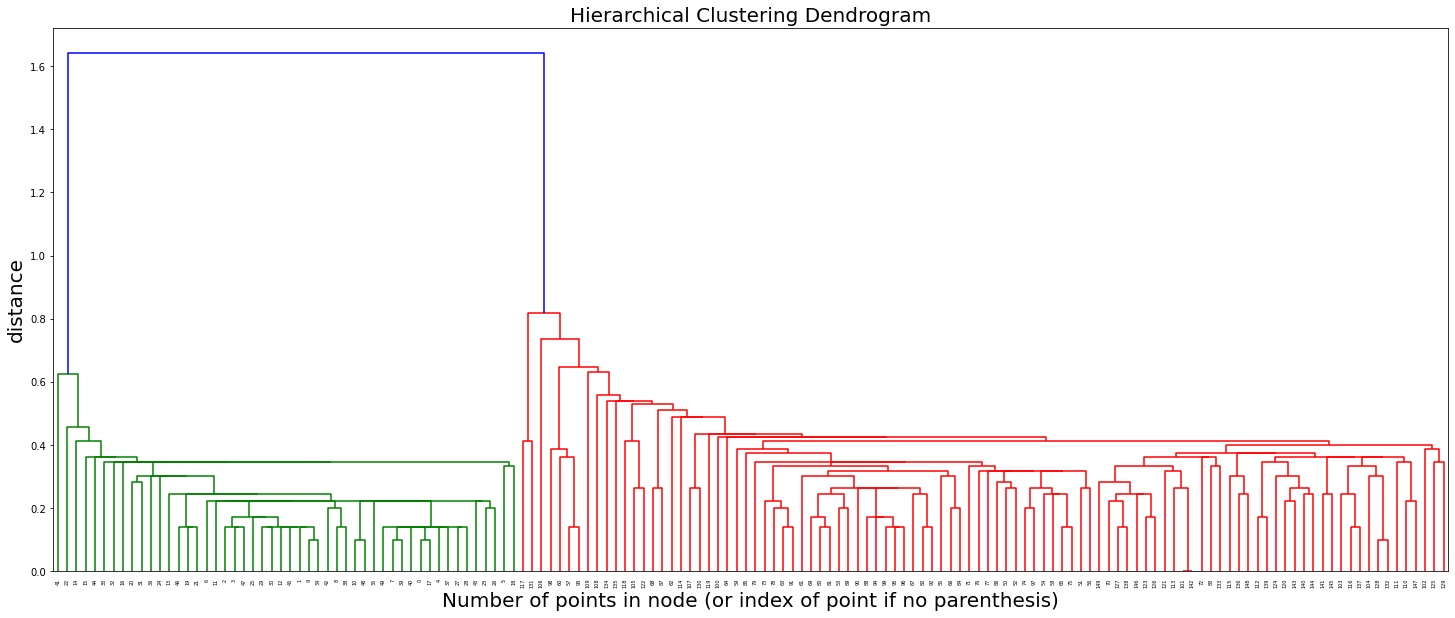

In [0]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'single') #Provide the type of linkage we wants.
dendrogram(Z) #compute the dendogram according the linkage

plt.show()

###Exercise
Plot the 3 other types of linkage and see what is changing

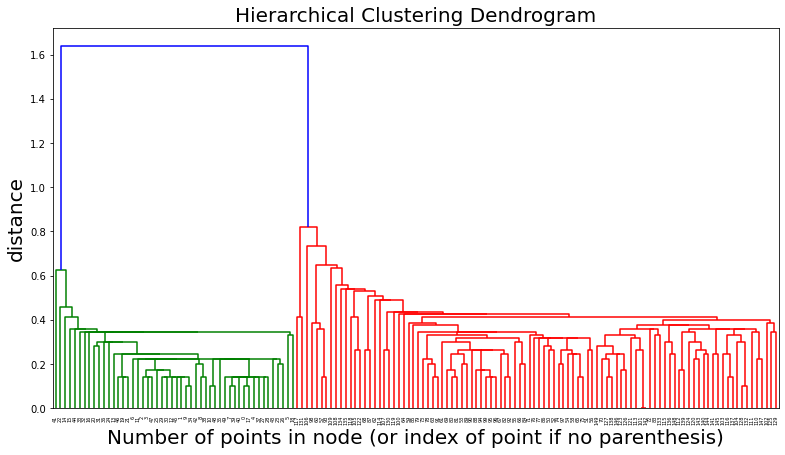

In [0]:
plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram Single linkage', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()

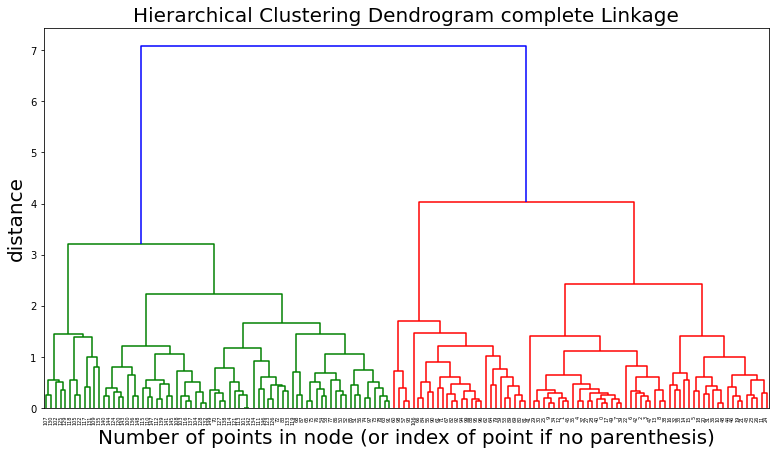

In [0]:
# complete linkage
plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram complete linkage', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()

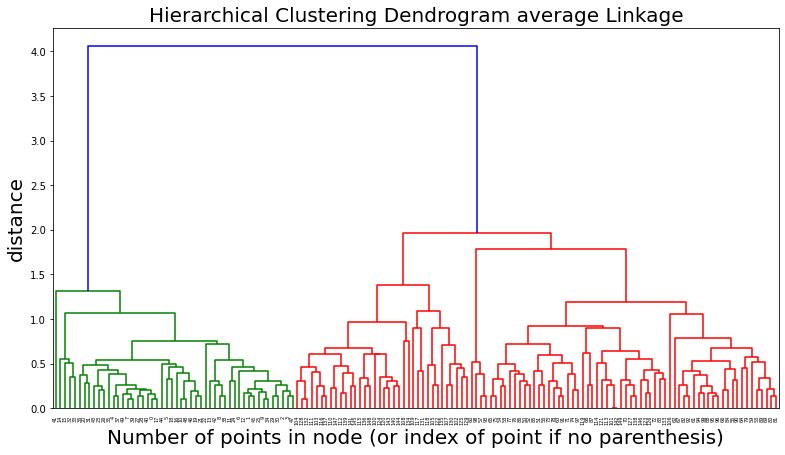

In [0]:
# average linkage

plt.figure(figsize=(13, 7))
plt.title('Hierarchical Clustering Dendrogram average linkage', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(X,'...') #something here
dendrogram(Z)

plt.show()